# DOWNLOADING DATA

In [0]:
import requests
import shutil

r = requests.get('https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip',stream=True)
with open('cell_images.zip', 'wb') as f:
    shutil.copyfileobj(r.raw, f)

In [0]:
!ls -sh cell_images.zip

338M cell_images.zip


In [0]:
!unzip cell_images.zip

In [0]:
!cd cell_images/ && cd Parasitized && rm *.db

In [0]:
!cd cell_images/ && cd Uninfected && rm *.db

In [0]:
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# MAKING DATASET OUT OF RAW IMAGES 

In [7]:
datadir = 'cell_images'
catagories = ['Parasitized','Uninfected']
img_size = 75
training_data = []

for catagory in catagories:
    path = os.path.join(datadir,catagory)
    classnum = catagories.index(catagory) 
    for img in tqdm(os.listdir(path)):
        image_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(image_array,(img_size,img_size))
        training_data.append([new_array,classnum])

100%|██████████| 13779/13779 [00:06<00:00, 1991.63it/s]


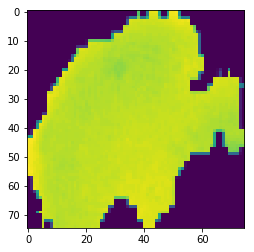

In [24]:
plt.imshow(new_array)

In [0]:
random.shuffle(training_data)

In [0]:
X = []
y = []

for image,lable in training_data:
    X.append(image)
    y.append(lable)

X = np.array(X)
y = np.array(y)

X = X.reshape(-1,75,75,1)

X = X/255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# TRAINING AND VALIDATION

In [21]:
model = Sequential()

model.add(Conv2D(32,(2,2),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y,batch_size=12,epochs=15,validation_split=0.30)

Train on 19290 samples, validate on 8268 samples
Epoch 1/15
19290/19290 [==============================] - 10s 541us/sample - loss: 0.5947 - acc: 0.6357 - val_loss: 0.2298 - val_acc: 0.9140
Epoch 2/15
19290/19290 [==============================] - 10s 511us/sample - loss: 0.1968 - acc: 0.9358 - val_loss: 0.1721 - val_acc: 0.9416
Epoch 3/15
19290/19290 [==============================] - 10s 513us/sample - loss: 0.1644 - acc: 0.9476 - val_loss: 0.1951 - val_acc: 0.9341
Epoch 4/15
19290/19290 [==============================] - 10s 507us/sample - loss: 0.1500 - acc: 0.9508 - val_loss: 0.1587 - val_acc: 0.9487
Epoch 5/15
19290/19290 [==============================] - 10s 505us/sample - loss: 0.1451 - acc: 0.9528 - val_loss: 0.1564 - val_acc: 0.9478
Epoch 6/15
19290/19290 [==============================] - 10s 512us/sample - loss: 0.1406 - acc: 0.9534 - val_loss: 0.1493 - val_acc: 0.9499
Epoch 7/15
19290/19290 [==============================] - 10s 510us/sample - loss: 0.1367 - acc: 0.9547 -

In [0]:
model.save('3-Con2D-X32-Dense-X64-Dense-X128.h5')